In [3]:
import torch
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

<function matplotlib.pyplot.show(*args, **kw)>

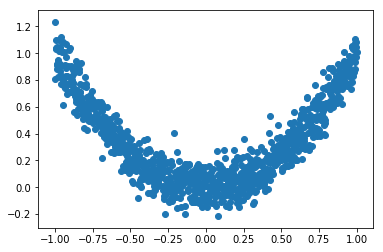

In [5]:
x = torch.unsqueeze(torch.linspace(-1,1,1000), dim = 1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))
plt.scatter(x.numpy(), y.numpy())
plt.show

In [7]:
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    torch_dataset, BATCH_SIZE, True,num_workers = 2
)

In [8]:
net = torch.nn.Sequential(
    torch.nn.Linear(1,20),
    torch.nn.functional.ReL(),
    torch.nn.Linear(20,1),
)

TypeError: relu() missing 1 required positional argument: 'input'

In [10]:
opt_sgd = torch.optim.SGD(net.parameters(), lr=LR)
loss_func = torch.nn.MSELoss()


In [28]:
l = []
for epoch in range(EPOCH):
    print("Epoch:", epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        output = net(batch_x)
        loss = loss_func(output, batch_y)
        opt_sgd.zero_grad()
        loss.backward()
        opt_sgd.step()
        l.append(loss.data[0])
        

Epoch: 0
Epoch: 1


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # Remove the CWD from sys.path while we load stuff.


Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11


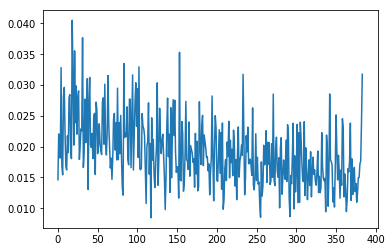

In [44]:
a = []
b = []
for i,j in enumerate(l):
    a.append(i)
    b.append(j.numpy())
plt.plot(a,b)

In [45]:
opt_sgd = torch.optim.SGD(net.parameters(), lr=LR, momentum=0.8)
loss_func = torch.nn.MSELoss()
l = []
for epoch in range(EPOCH):
    print("Epoch:", epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        output = net(batch_x)
        loss = loss_func(output, batch_y)
        opt_sgd.zero_grad()
        loss.backward()
        opt_sgd.step()
        l.append(loss.data[0])

Epoch: 0
Epoch: 1


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  if sys.path[0] == '':


Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11


In [46]:
a1 = []
b1 = []
for i,j in enumerate(l):
    a1.append(i)
    b1.append(j.numpy())

In [47]:
opt_sgd = torch.optim.RMSprop(net.parameters(), lr=LR, alpha=0.9)
loss_func = torch.nn.MSELoss()
l = []
for epoch in range(EPOCH):
    print("Epoch:", epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        output = net(batch_x)
        loss = loss_func(output, batch_y)
        opt_sgd.zero_grad()
        loss.backward()
        opt_sgd.step()
        l.append(loss.data[0])

Epoch: 0
Epoch: 1


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  if sys.path[0] == '':


Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11


In [50]:
a2 = []
b2 = []
for i,j in enumerate(l):
    a2.append(i)
    b2.append(j.numpy())

In [51]:
opt_sgd = torch.optim.Adam(net.parameters(), lr=LR, betas=(0.9,0.99))
loss_func = torch.nn.MSELoss()
l = []
for epoch in range(EPOCH):
    print("Epoch:", epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        output = net(batch_x)
        loss = loss_func(output, batch_y)
        opt_sgd.zero_grad()
        loss.backward()
        opt_sgd.step()
        l.append(loss.data[0])

Epoch: 0
Epoch: 1


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  if sys.path[0] == '':


Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11


In [52]:
a3 = []
b3 = []
for i,j in enumerate(l):
    a3.append(i)
    b3.append(j.numpy())

In [53]:
index = [a,a1,a2,a3]
value = [b,b1,b2,b3]

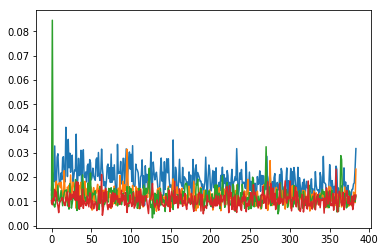

In [61]:
labels = ["sgd",'momentum','rmsprop', 'adam']
num = 0
for i,j in zip(index, value):
    plt.plot(i,j,label=labels[num])
    num+=1